### This notebook uses MIRNet model from 🤗 Model Hub to enhance Low Light Images using Keras

![](https://img.youtube.com/vi/JRdWOAqQaUc/hqdefault.jpg)

### Objective

The objective of the notebook is to showcase how simple and easy it is to use a pre-trained Keras model from Hugging Face and build a Deep Learning powered Tool 

Associated YouTube Tutorial -https://www.youtube.com/watch?v=JRdWOAqQaUc

Downloading and installing required libraries

In [1]:
! pip install keras

The pre-trained model wil be downloaded from Hugging Face Model Hub, hence we're installing `huggingface_hub`

In [2]:
! pip install huggingface_hub

These are the other two libraries used in this code but it's available with Kaggle Notebooks without Installations

In [3]:
#numpy
#Pillow

Loading required libraries

In [4]:
import numpy as np # array manipulation
from huggingface_hub import from_pretrained_keras # download the model
import keras # deep learning
from PIL import Image # Image processing

In [5]:
#from PIL import Image # Image processing

In [6]:
model = from_pretrained_keras("keras-io/lowlight-enhance-mirnet", compile=False)

config.json not found in HuggingFace Hub


Downloading:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.67k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.45M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.56M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/17.5k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.19M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.1M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/14.0M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/437M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/219k [00:00<?, ?B/s]

2022-04-22 18:22:17.626140: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [7]:
#! wget

If you happen to read PNG images, it's possible they are read as `RGBA` with a transparency channel.Hence, while reading/opening the input image, we are converting it to `RGB` (removing the transparency channel).


In [8]:
#005e53b1b6aada 00354cd9244e28

low_light_img = Image.open('../input/happy-whale-and-dolphin/train_images/00354cd9244e28.jpg').convert('RGB')

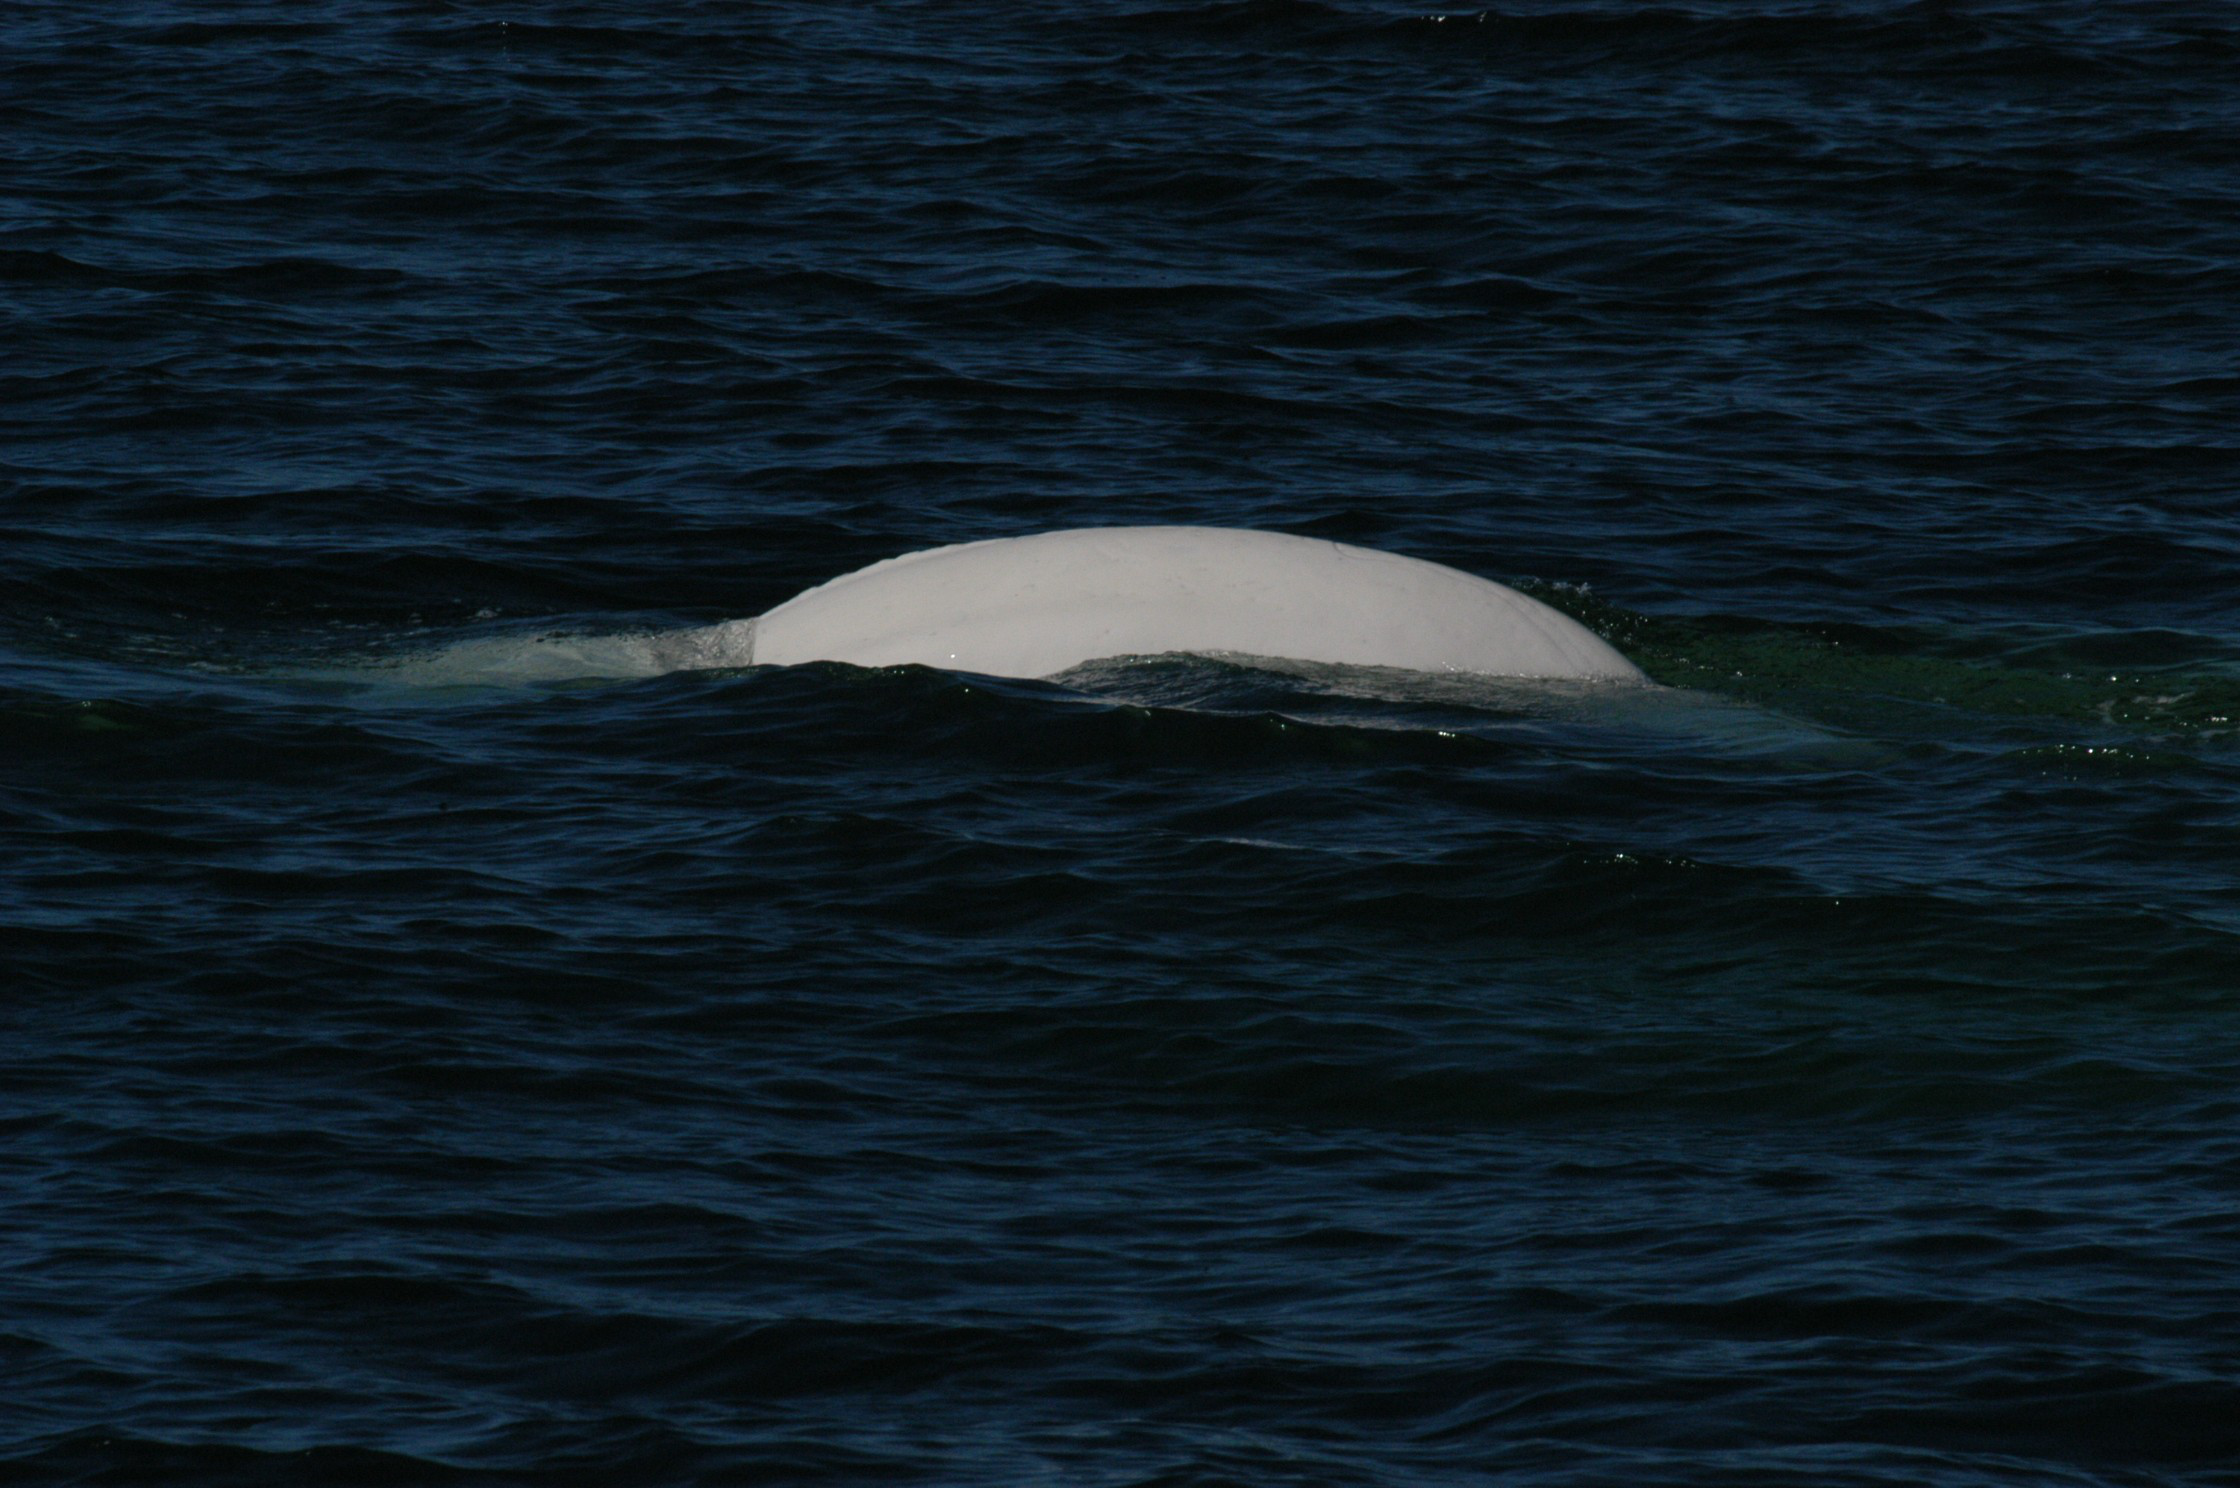

In [9]:
low_light_img

There are lot of different methods to resize the image, this is one of the simpler methods but I'd strongly encourage you to check other options here - https://pillow.readthedocs.io/en/stable/handbook/concepts.html#concept-filters

In [10]:
low_light_img = low_light_img.resize((256,256),Image.NEAREST)

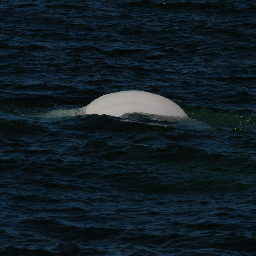

In [11]:
low_light_img

In [12]:
image = keras.preprocessing.image.img_to_array(low_light_img)

In [13]:
image.shape

(256, 256, 3)

In [14]:
image = image.astype('float32') / 255.0

In [15]:
image.shape

(256, 256, 3)

In [16]:
image = np.expand_dims(image, axis = 0)

In [17]:
image.shape

(1, 256, 256, 3)

In [18]:
output = model.predict(image) # model inference to enhance the low light pics

2022-04-22 18:23:00.545896: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [19]:
output_image = output[0] * 255.0

In [20]:
output_image.shape

(256, 256, 3)

In [21]:
output_image = output_image.clip(0,255)

In [22]:
output_image.shape

(256, 256, 3)

In [23]:
#output_image

In [24]:
output_image = output_image.reshape((np.shape(output_image)[0],np.shape(output_image)[1],3))

In [25]:
output_image

array([[[ 75.927765,  90.44433 , 100.36248 ],
        [ 98.26136 , 116.37938 , 143.26581 ],
        [112.696045, 151.7278  , 177.84164 ],
        ...,
        [ 89.94365 , 114.33969 , 135.48743 ],
        [ 91.46919 , 107.76184 , 123.99914 ],
        [ 84.028366, 100.88614 , 123.06505 ]],

       [[ 96.2401  ,  87.456924, 106.73138 ],
        [ 96.12944 ,  95.80934 , 124.13488 ],
        [ 73.13187 , 101.668564, 136.89339 ],
        ...,
        [ 83.40862 , 126.74953 , 133.8411  ],
        [ 83.54708 , 122.20536 , 133.4005  ],
        [ 80.203835, 103.40724 , 126.37085 ]],

       [[109.46592 , 104.46726 , 134.79242 ],
        [104.49527 , 136.48215 , 158.13628 ],
        [ 83.81156 , 135.99397 , 177.46024 ],
        ...,
        [ 93.32238 , 124.456566, 154.63977 ],
        [101.12119 , 122.99564 , 170.31253 ],
        [101.16814 , 114.48092 , 139.1392  ]],

       ...,

       [[ 76.21479 ,  77.28503 ,  70.19039 ],
        [ 73.23494 ,  83.81319 ,  76.37132 ],
        [ 74.21954 ,  

In [26]:
output_image = np.uint32(output_image)

In [27]:
#output_image

Final Image

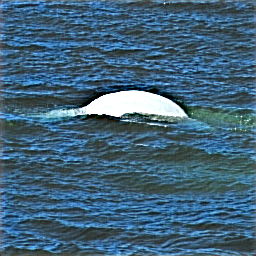

In [28]:
Image.fromarray(output_image.astype('uint8'),'RGB')

The end

# Resources

* [Low Light Image Enhancement in Python & Keras | Pixel-like NightMode using Deep Learning - Tutorial
](https://www.youtube.com/watch?v=JRdWOAqQaUc)

* [https://huggingface.co/keras-io/lowlight-enhance-mirnet](MIRnet on Hugging Face)

* [Mirnet Keras Documentation](https://keras.io/examples/vision/mirnet/)